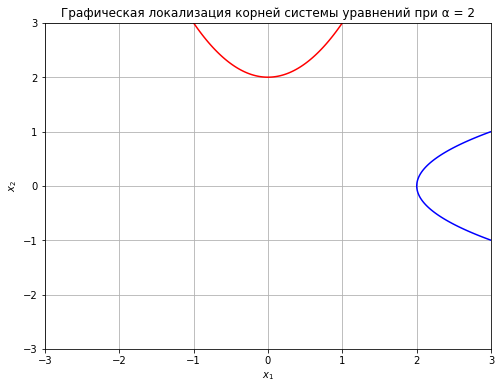

Корень для α = 2 не найден.


C:\Users\ender\AppData\Local\Temp\ipykernel_22800\46802096.py:9: RuntimeWarning: overflow encountered in scalar power
  x1**2 - x2 + alpha,
C:\Users\ender\AppData\Local\Temp\ipykernel_22800\46802096.py:10: RuntimeWarning: overflow encountered in scalar power
  -x1 + x2**2 + alpha


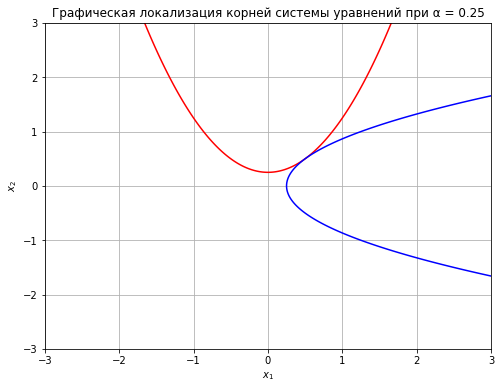

Корень для α = 0.25: [0.49060422 0.49060422], найден за 100 итераций.


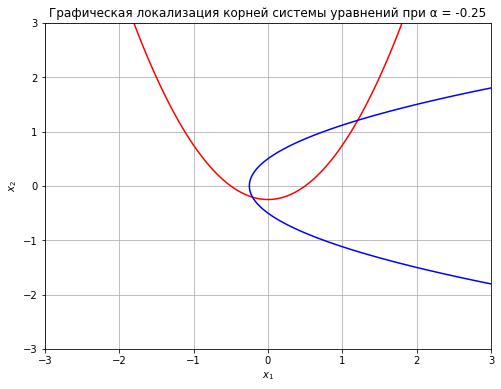

Корень для α = -0.25: [-0.20711357 -0.20711357], найден за 12 итераций.


{2: (array([nan, nan]), 100),
 0.25: (array([0.49060422, 0.49060422]), 100),
 -0.25: (array([-0.20711357, -0.20711357]), 12)}

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Определение функций системы и их Якобиана
def system_of_equations_with_alpha(variables, alpha):
    x1, x2 = variables
    return np.array([
        x1**2 - x2 + alpha,
        -x1 + x2**2 + alpha
    ])

def jacobian_with_alpha(variables, alpha):
    x1, x2 = variables
    return np.array([
        [2*x1, -1],
        [-1, 2*x2]
    ])

# Визуализация системы уравнений для локализации корней
def visualize_system_with_alpha(alpha, xlim=(-3, 3), ylim=(-3, 3)):
    x = np.linspace(xlim[0], xlim[1], 400)
    y = np.linspace(ylim[0], ylim[1], 400)
    X, Y = np.meshgrid(x, y)
    F1 = X**2 - Y + alpha
    F2 = -X + Y**2 + alpha
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, F1, levels=[0], colors='r')
    plt.contour(X, Y, F2, levels=[0], colors='b')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'Графическая локализация корней системы уравнений при α = {alpha}')
    plt.grid(True)
    plt.show()

# Упрощенный метод Ньютона для системы нелинейных уравнений
def simplified_newton_method(F, J, x0, alpha, eps=1e-5, max_iter=100):
    x = x0
    Jx = J(x, alpha)  # Вычисление якобиана только один раз
    for i in range(max_iter):
        Fx = F(x, alpha)
        if np.linalg.norm(Fx, ord=np.inf) < eps:
            return x, i+1  # Возвращает найденное решение и количество итераций
        try:
            Dx = np.linalg.solve(Jx, -Fx)
        except np.linalg.LinAlgError as e:
            print(f"Не удалось найти корень при α = {alpha}: {e}")
            return None, i+1
        x = x + Dx
    return x, max_iter

# Значения параметра alpha
alphas = [2, 0.25, -0.25]

# Применение метода Ньютона для каждого значения alpha
roots_alpha = {}
for alpha in alphas:
    visualize_system_with_alpha(alpha)
    initial_guess = np.array([0, 0])  # Начальное приближение в центре
    root, iter_count = simplified_newton_method(system_of_equations_with_alpha, jacobian_with_alpha, initial_guess, alpha)
    roots_alpha[alpha] = (root, iter_count)
    if not np.any(np.isnan(root)):
        print(f"Корень для α = {alpha}: {root}, найден за {iter_count} итераций.")
    else:
        print(f"Корень для α = {alpha} не найден.")

# Вывод результатов
roots_alpha
